<a href="https://colab.research.google.com/github/kanthavelan/Aerofit-customer-analysis/blob/main/Aerofit_Treadmill_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Insight : There is no null data here from the above information

In [ ]:
df.duplicated().value_counts()

False    180
Name: count, dtype: int64

#Insight : There is no duplicate data

In [ ]:
#Statistical summary
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#Insight :
#Age - Avg-28 from 18 to 50
#Education - Avg-16 from 12 to 21
#usage - Avg-3 from 2 to 7
#Fitness - Avg-3 from 1 to 5
#Income - Avg-54K USD from 30K USD to 100,000 USD
#Miles - Avg-103 from 21 to 360

In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#Insight
#Product - Approx 44% total sales of the KP281 product among the three products
#Gender - Around 56% Male and 44% Female buyers
#MaritalStatus - Around 60% Married and 40% Unmarried

In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#Copy the dataset

In [ ]:
aero_df = df.copy()
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# category the age group

In [ ]:
aero_df['Age'].value_counts()

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

In [ ]:
age_range = [17,24,36,50,float('inf')]
age_labels = ['Teen','Adult','Mid-Age Adult','Elder']

aero_df['age-group'] = pd.cut(aero_df['Age'],bins = age_range, labels = age_labels)
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age-group
0,KP281,18,Male,14,Single,3,4,29562,112,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen


# category the education group


In [ ]:
aero_df['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [ ]:
education_range = [0,12,15,float('inf')]
education_labels = ['Primary-Education','Secondary-Education','Higher-Education']

aero_df['education-group'] = pd.cut(aero_df['Education'],bins = education_range, labels = education_labels)
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age-group,education-group
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Secondary-Education
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Secondary-Education
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Secondary-Education
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Primary-Education
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Secondary-Education


#category the income group

In [ ]:
aero_df['Income'].value_counts().head()

Income
45480    14
52302     9
46617     8
54576     8
53439     8
Name: count, dtype: int64

In [ ]:
income_range = [0,45000,60000,80000,float('inf')]
income_labels = ['Low','Moderate','High','Very High']

aero_df['income-group'] = pd.cut(aero_df['Income'],bins = income_range, labels = income_labels)
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age-group,education-group,income-group
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Secondary-Education,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Secondary-Education,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Secondary-Education,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Primary-Education,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Secondary-Education,Low


#category the miles group

In [ ]:
aero_df['Miles'].value_counts()

Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: count, dtype: int64

In [ ]:
miles_range = [0,50,100,200,float('inf')]
miles_labels = ['Low Activity','Moderate Activity','Active Lifestyle','Fitness Freak']

aero_df['miles-group'] = pd.cut(aero_df['Miles'],bins = miles_range, labels = miles_labels)
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age-group,education-group,income-group,miles-group
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Secondary-Education,Low,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Secondary-Education,Low,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Secondary-Education,Low,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Primary-Education,Low,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Secondary-Education,Low,Low Activity


#UNIVARIATE ANALYSIS

#Gender Distribution

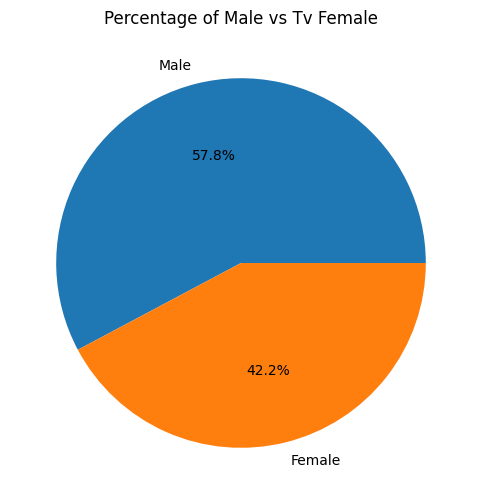

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentage of Male vs Tv Female")
plt.pie(aero_df['Gender'].value_counts(),labels=aero_df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

#MaritalStatus Distribution

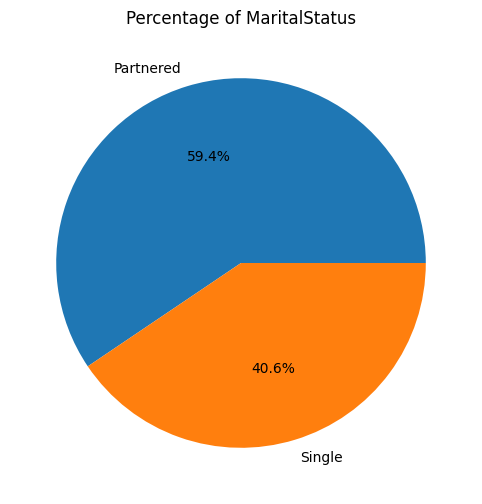

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentage of MaritalStatus")
plt.pie(aero_df['MaritalStatus'].value_counts(),labels=aero_df['MaritalStatus'].value_counts().index,autopct='%1.1f%%')
plt.show()

#Product Sales Distribution

In [ ]:
table = aero_df.groupby(['Product']).size().reset_index()
table.columns = ['Product','Counts']
table['percentage'] = table['Counts']/sum(table['Counts'])*100
table['Percent'] = round(table['percentage'],1).astype(str) + '%'
table

,Product,Counts,percentage,Percent
0,KP281,80,44.444444,44.4%
1,KP481,60,33.333333,33.3%
2,KP781,40,22.222222,22.2%


Text(0.5, 1.0, 'Product_Sales_Count')

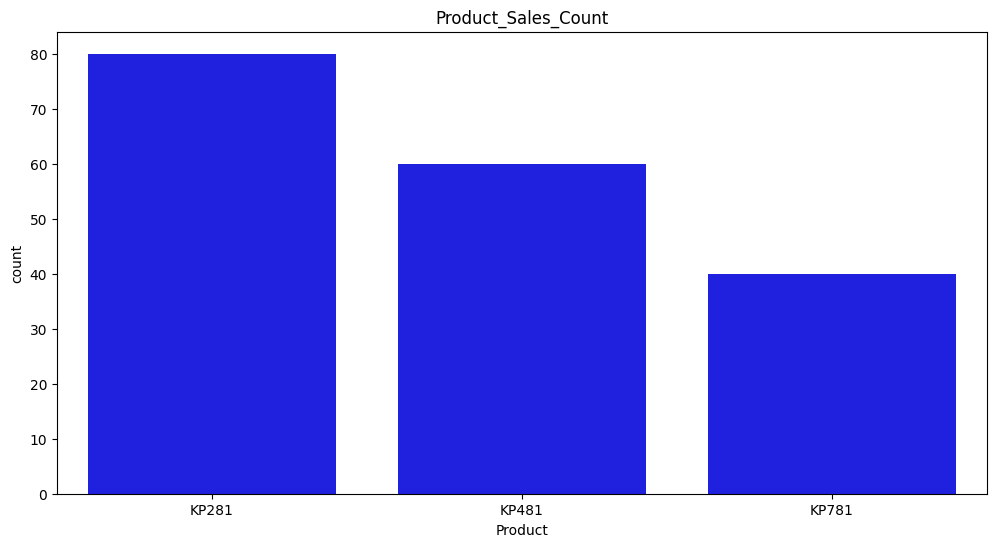

In [ ]:
plt.figure(figsize=(12,6))
Product_Sales_Count = sns.countplot(x='Product',data=aero_df,order=aero_df['Product'].value_counts().index,color = 'blue')
Product_Sales_Count
plt.title('Product_Sales_Count')

#Insight :
#KP281 entry level model has 44% sales.
#KP481 mid level model has 33% sales.
#KP781 advanced level model has 22% sales.
#But three models are nearly equal contributions.

#Fitness and Treadmill usage

In [ ]:
usage = aero_df.groupby(['Usage']).size().reset_index()
usage.columns = ['Usage','Counts']
usage['percentage'] = usage['Counts']/sum(usage['Counts'])*100
usage['Percent'] = round(usage['percentage'],1).astype(str) + '%'
usage.sort_values('Counts',ascending=False)

,Usage,Counts,percentage,Percent
1,3,69,38.333333,38.3%
2,4,52,28.888889,28.9%
0,2,33,18.333333,18.3%
3,5,17,9.444444,9.4%
4,6,7,3.888889,3.9%
5,7,2,1.111111,1.1%


Text(0.5, 1.0, 'Treadmill_usage_Count_per_week')

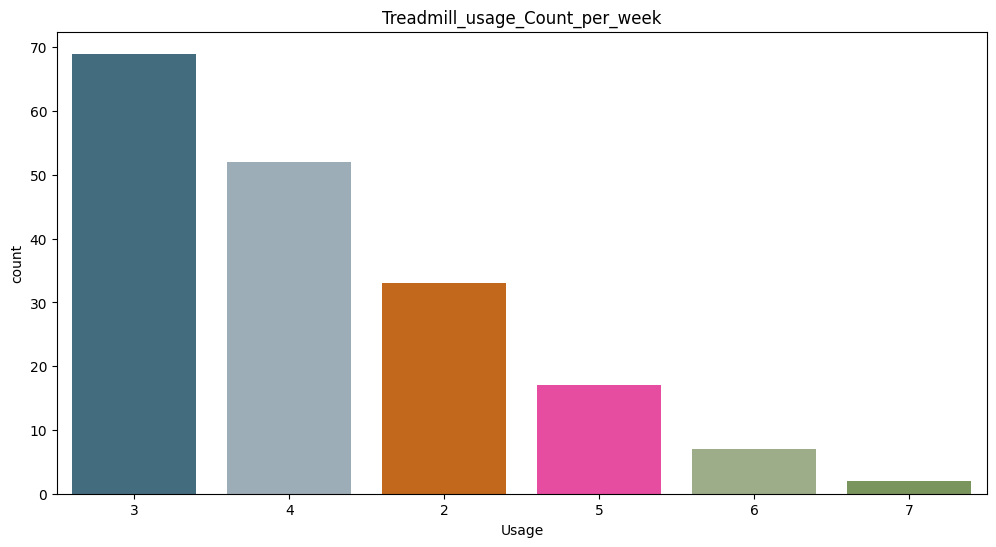

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601", "#FF33A1","#9EB384","#7A9D54"]
Treadmill_usage_Count_per_week = sns.countplot(x='Usage',data=aero_df,order=aero_df['Usage'].value_counts().index, palette = palette)
Treadmill_usage_Count_per_week
plt.title('Treadmill_usage_Count_per_week')

#Insight : 85% people using treadmill 2 to 4 times a week and 15% people using treadmill 5 and more than 5 times each week

In [ ]:
fitness = aero_df.groupby(['Fitness']).size().reset_index()
fitness.columns = ['Fitness','Counts']
fitness['percentage'] = fitness['Counts']/sum(fitness['Counts'])*100
fitness['Percent'] = round(fitness['percentage'],1).astype(str) + '%'
fitness.sort_values('Counts',ascending=False)

,Fitness,Counts,percentage,Percent
2,3,97,53.888889,53.9%
4,5,31,17.222222,17.2%
1,2,26,14.444444,14.4%
3,4,24,13.333333,13.3%
0,1,2,1.111111,1.1%


Text(0.5, 1.0, 'Fitness_level_Count')

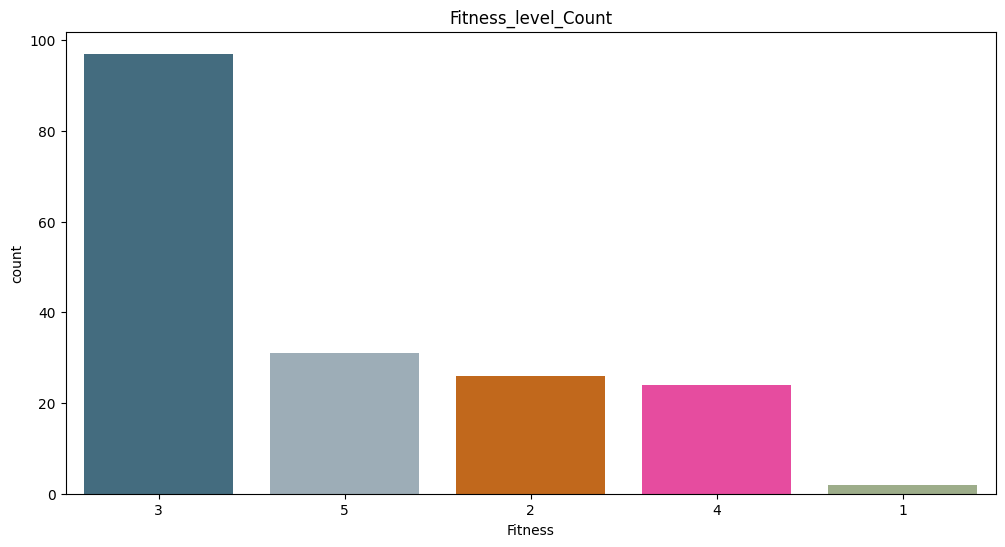

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601", "#FF33A1","#9EB384","#7A9D54"]
Fitness_level_Count = sns.countplot(x='Fitness',data=aero_df,order=aero_df['Fitness'].value_counts().index, palette = palette)
Fitness_level_Count
plt.title('Fitness_level_Count')

#Insight : based on the above chart, 54% of customers fitness level at 3 on a scale 1 to 5. 17% at 5, 14% at 2,13% at 4 and 1% at 1

#Customer Age Distribution

In [ ]:
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age-group,education-group,income-group,miles-group
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Secondary-Education,Low,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Secondary-Education,Low,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Secondary-Education,Low,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Primary-Education,Low,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Secondary-Education,Low,Low Activity


In [ ]:
age = aero_df.groupby(['age-group']).size().reset_index()
age.columns = ['age-group','Counts']
age['percentage'] = age['Counts']/sum(age['Counts'])*100
age['Percent'] = round(age['percentage'],1).astype(str) + '%'
age.sort_values('Counts',ascending=False)

,age-group,Counts,percentage,Percent
1,Adult,99,55.0,55.0%
0,Teen,54,30.0,30.0%
2,Mid-Age Adult,27,15.0,15.0%
3,Elder,0,0.0,0.0%


<Axes: xlabel='Age', ylabel='Count'>

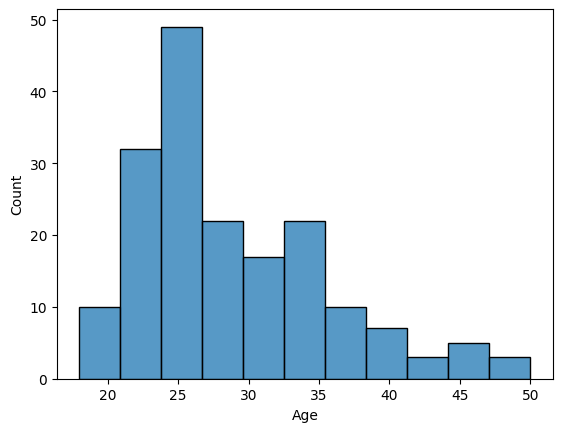

In [ ]:
sns.histplot(data=aero_df,x='Age')

Text(0.5, 1.0, 'age_group_distribution')

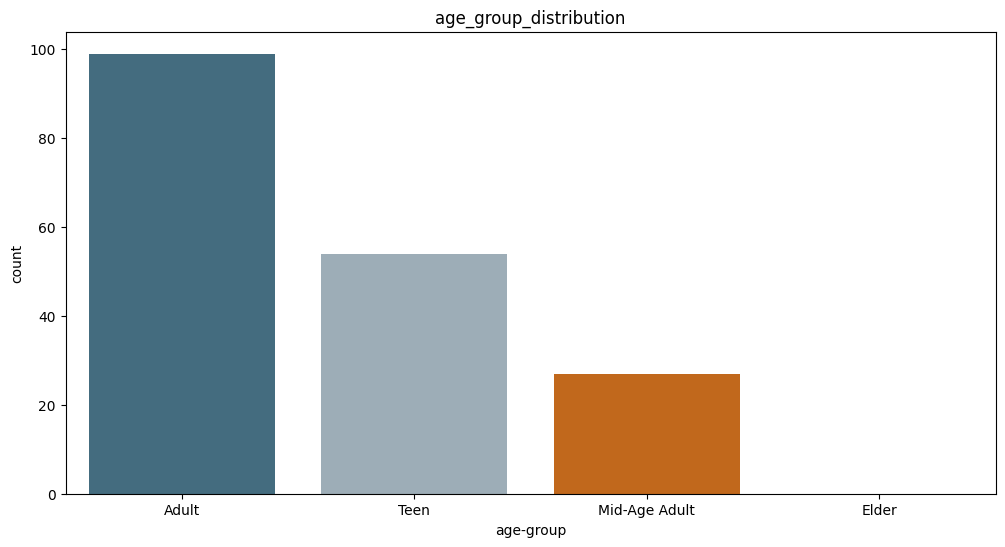

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601", "#FF33A1","#9EB384","#7A9D54"]
age_group_distribution = sns.countplot(x='age-group',data=aero_df,order=aero_df['age-group'].value_counts().index, palette = palette)
age_group_distribution
plt.title('age_group_distribution')

#Insight : 85% of customers are Adult and teen showing more interest for fitness in the range of 18 to 35 age

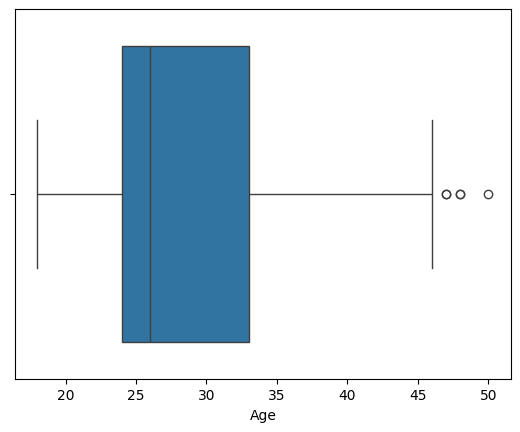

In [ ]:
# Create the boxplot
sns.boxplot(x=aero_df['Age'])
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = aero_df['Age'].quantile(0.25)
Q3 = aero_df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = aero_df[(aero_df['Age'] < lower_bound) | (aero_df['Age'] > upper_bound)]



# Insight : Observed from the above box plot, we can see three outlier in the Age column

#Education Distribution

In [ ]:
education = aero_df.groupby(['education-group']).size().reset_index()
education.columns = ['education-group','Counts']
education['percentage'] = education['Counts']/sum(education['Counts'])*100
education['Percent'] = round(education['percentage'],1).astype(str) + '%'
education.sort_values('Counts',ascending=False)

,education-group,Counts,percentage,Percent
2,Higher-Education,112,62.222222,62.2%
1,Secondary-Education,65,36.111111,36.1%
0,Primary-Education,3,1.666667,1.7%


<Axes: xlabel='Education', ylabel='Count'>

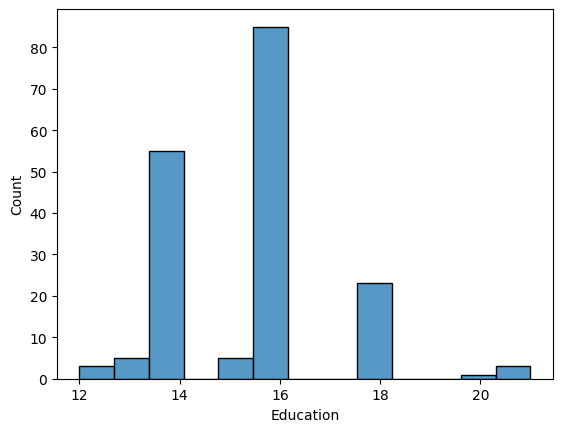

In [ ]:
sns.histplot(data=aero_df,x='Education')

Text(0.5, 1.0, 'education_group_distribution')

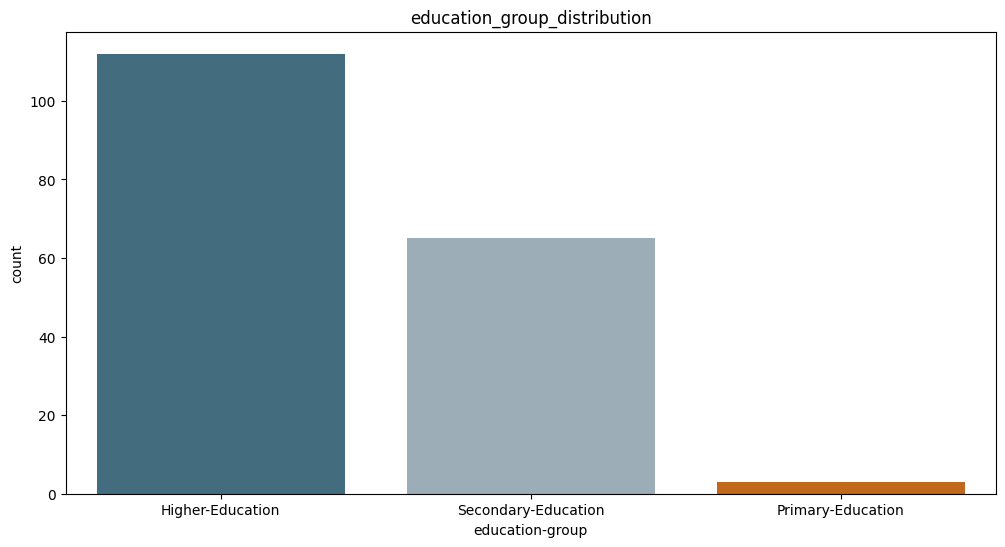

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601", "#FF33A1","#9EB384","#7A9D54"]
education_group_distribution = sns.countplot(x='education-group',data=aero_df,order=aero_df['education-group'].value_counts().index, palette = palette)
education_group_distribution
plt.title('education_group_distribution')

#Insight: Observed from the bar chart, 62% of customers have higher education and 36% of customers have secondary education and 2% in primary education. It seems like well educated customers to purchase the products.



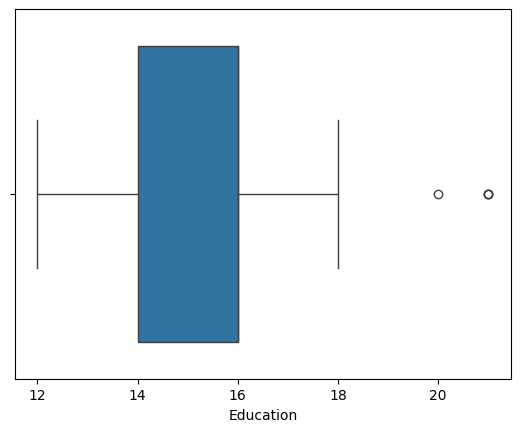

In [ ]:
  # Create the boxplot
sns.boxplot(x=aero_df['Education'])
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = aero_df['Education'].quantile(0.25)
Q3 = aero_df['Education'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = aero_df[(aero_df['Education'] < lower_bound) | (aero_df['Education'] > upper_bound)]



#Insight : From the above graph, there are two outliers in the Education column

#Income distribution

In [ ]:
income = aero_df.groupby(['income-group']).size().reset_index()
income.columns = ['income-group','Counts']
income['percentage'] = income['Counts']/sum(income['Counts'])*100
income['Percent'] = round(income['percentage'],1).astype(str) + '%'
income.sort_values('Counts',ascending=False)

,income-group,Counts,percentage,Percent
1,Moderate,89,49.444444,49.4%
0,Low,49,27.222222,27.2%
2,High,23,12.777778,12.8%
3,Very High,19,10.555556,10.6%


<Axes: xlabel='Income', ylabel='Count'>

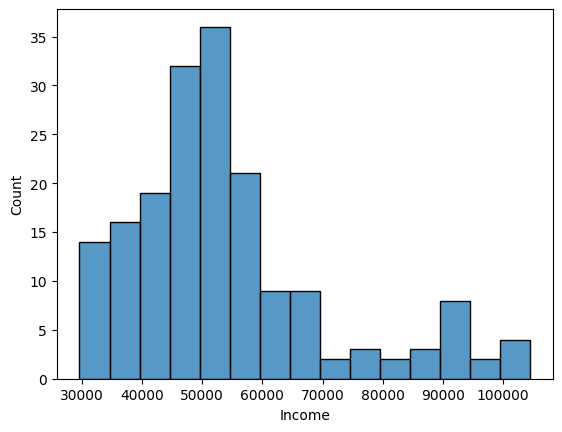

In [ ]:
sns.histplot(data=aero_df,x='Income')

Text(0.5, 1.0, 'income_group_distribution')

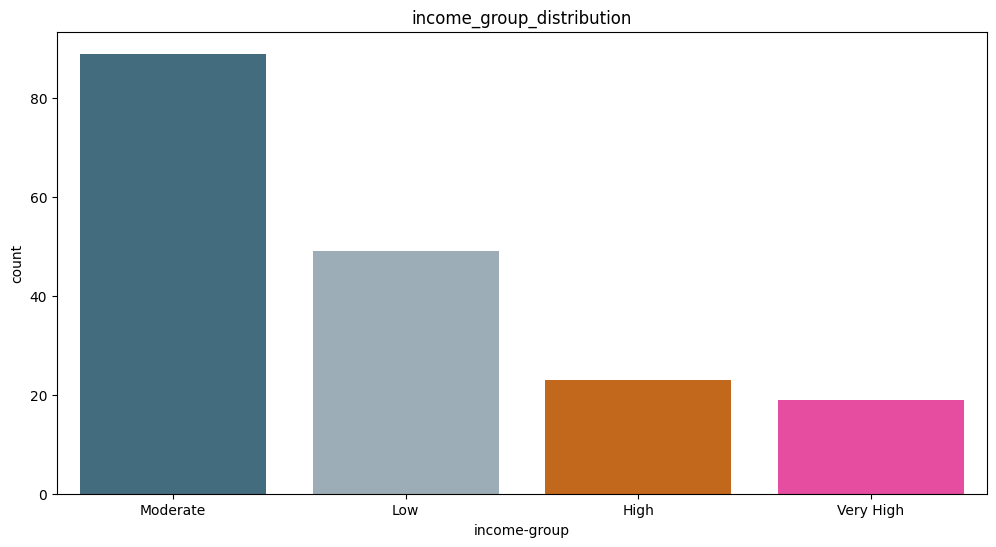

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601", "#FF33A1","#9EB384","#7A9D54"]
income_group_distribution = sns.countplot(x='income-group',data=aero_df,order=aero_df['income-group'].value_counts().index, palette = palette)
income_group_distribution
plt.title('income_group_distribution')

#Insight : Almost 60% of customers fall in the moderate income group.(40k to 60k)
#27% of customers fall in the low income group (below 40k)
#22% of customers fall in the high and very high group (above 60k)

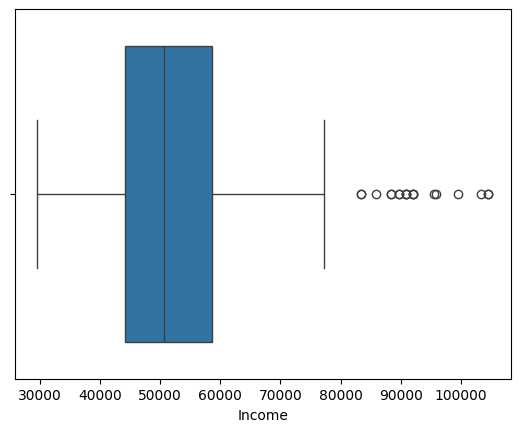

In [ ]:
# Create the boxplot
sns.boxplot(x=aero_df['Income'])
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = aero_df['Income'].quantile(0.25)
Q3 = aero_df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = aero_df[(aero_df['Income'] < lower_bound) | (aero_df['Income'] > upper_bound)]



#Insight :  Observation from the boxplot, there are many outliers in the income column

#Miles Distribution

In [ ]:
miles = aero_df.groupby(['miles-group']).size().reset_index()
miles.columns = ['miles-group','Counts']
miles['percentage'] = miles['Counts']/sum(miles['Counts'])*100
miles['Percent'] = round(miles['percentage'],1).astype(str) + '%'
miles.sort_values('Counts',ascending=False)

,miles-group,Counts,percentage,Percent
1,Moderate Activity,97,53.888889,53.9%
2,Active Lifestyle,60,33.333333,33.3%
0,Low Activity,17,9.444444,9.4%
3,Fitness Freak,6,3.333333,3.3%


<Axes: xlabel='Miles', ylabel='Count'>

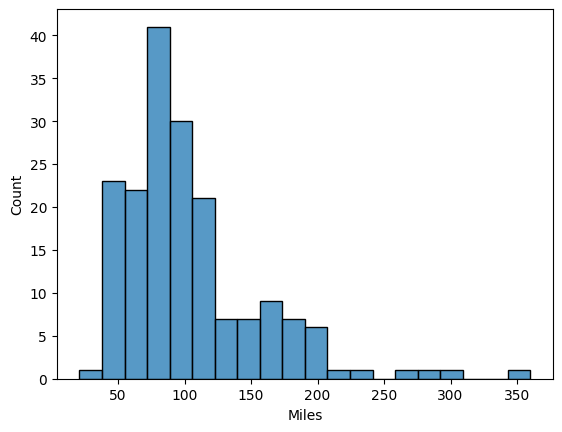

In [ ]:
sns.histplot(data=aero_df,x='Miles')

In [ ]:
df['Miles'].median()

94.0

Text(0.5, 1.0, 'miles_group_distribution')

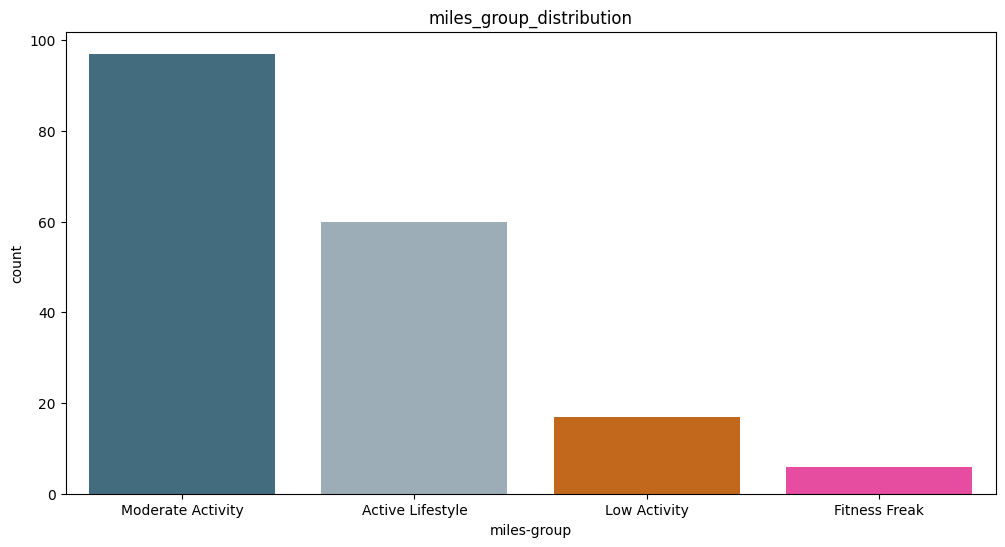

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601", "#FF33A1","#9EB384","#7A9D54"]
miles_group_distribution = sns.countplot(x='miles-group',data=aero_df,order=aero_df['miles-group'].value_counts().index, palette = palette)
miles_group_distribution
plt.title('miles_group_distribution')

#Insight: Almost 87% of customers use treadmill for 50 to 200 miles per week with median 94 miles.

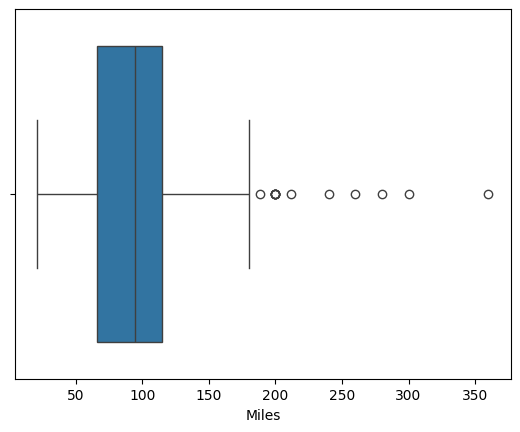

In [ ]:
# Create the boxplot
sns.boxplot(x=aero_df['Miles'])
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = aero_df['Miles'].quantile(0.25)
Q3 = aero_df['Miles'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = aero_df[(aero_df['Miles'] < lower_bound) | (aero_df['Miles'] > upper_bound)]



#Insight : Observed from the boxplot, there are many outliers are there in the miles column

In [ ]:
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age-group,education-group,income-group,miles-group
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Secondary-Education,Low,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Secondary-Education,Low,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Secondary-Education,Low,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Primary-Education,Low,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Secondary-Education,Low,Low Activity


#BIVARIATE ANALYSIS

#Product vs Gender

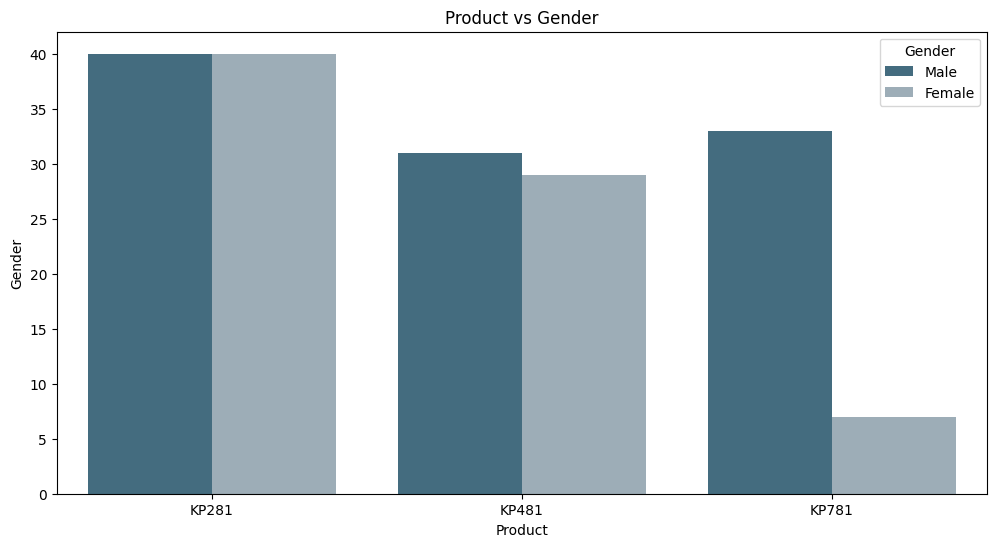

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601", "#FF33A1","#9EB384","#7A9D54"]
ax = sns.countplot(data=aero_df,x='Product', hue='Gender', palette = palette)
plt.title('Product vs Gender')
ax.set(ylabel = 'Gender')
plt.show()

#Insight : Equal number of males and females have purchased KP281 and almost same for KP481.
#Most of the male customers have purchased KP781

#Recommendation:
#KP781 Model has less number of female customers. It is recommend to provide special offer and promotions to female customer

#Product vs MaritalStatus

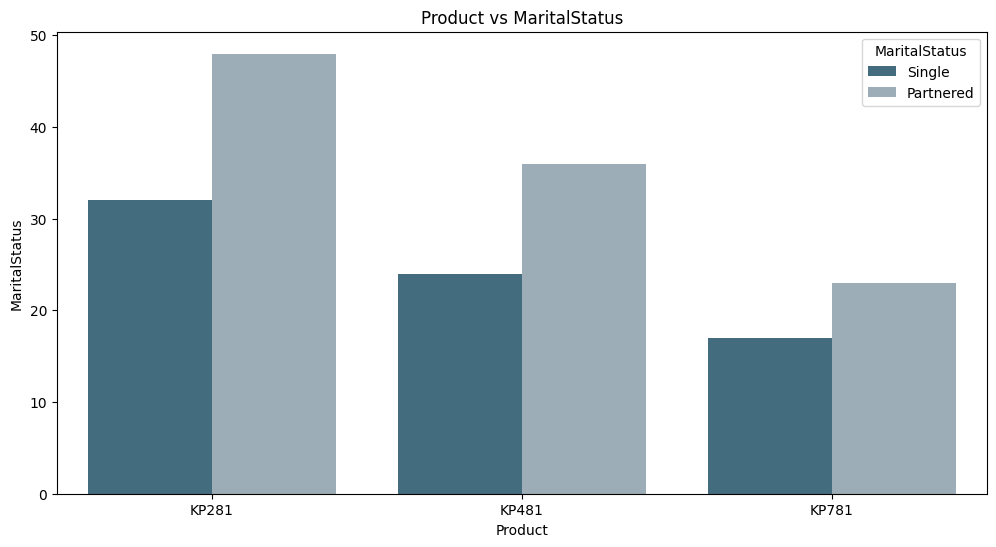

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601", "#FF33A1","#9EB384","#7A9D54"]
ax = sns.countplot(data=aero_df,x='Product', hue='MaritalStatus', palette = palette)
plt.title('Product vs MaritalStatus')
ax.set(ylabel = 'MaritalStatus')
plt.show()

#Insight: Customer who is Partnered, is more likely to purcahse the product

#Product vs Education vs Age vs Income vs Miles

Text(0.5, 1.0, 'Product vs Education')

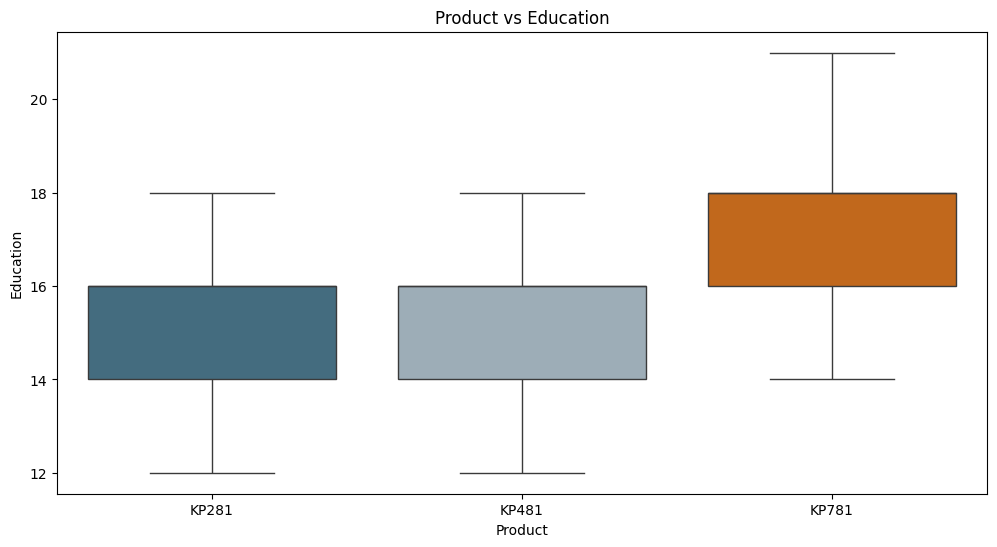

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601"]
ax_ed= sns.boxplot(data=aero_df,x='Product',y='Education',palette = palette)
ax_ed.set_title('Product vs Education')

Text(0.5, 1.0, 'Product vs Age')

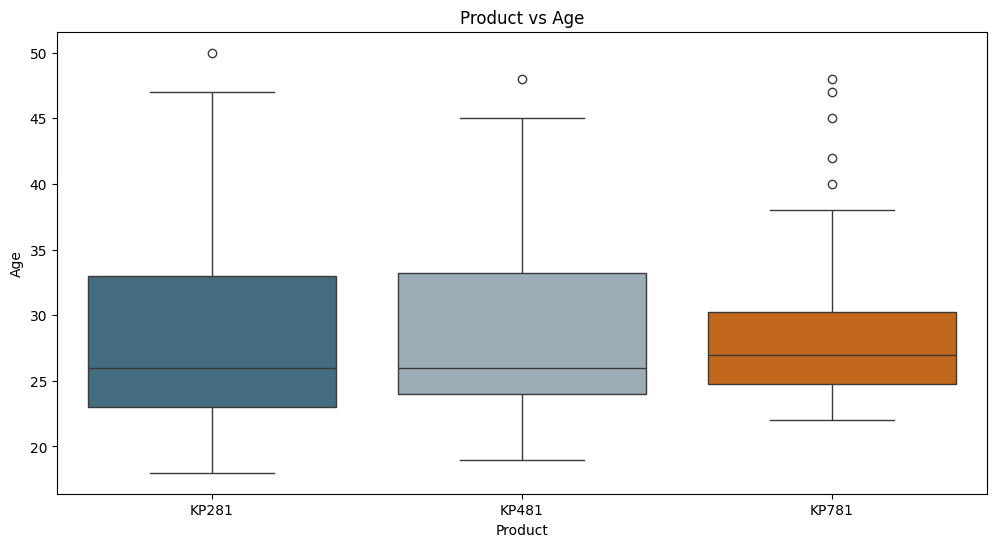

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601"]
ax_age= sns.boxplot(data=aero_df,x='Product',y='Age',palette = palette)
ax_age.set_title('Product vs Age')

Text(0.5, 1.0, 'Product vs Income')

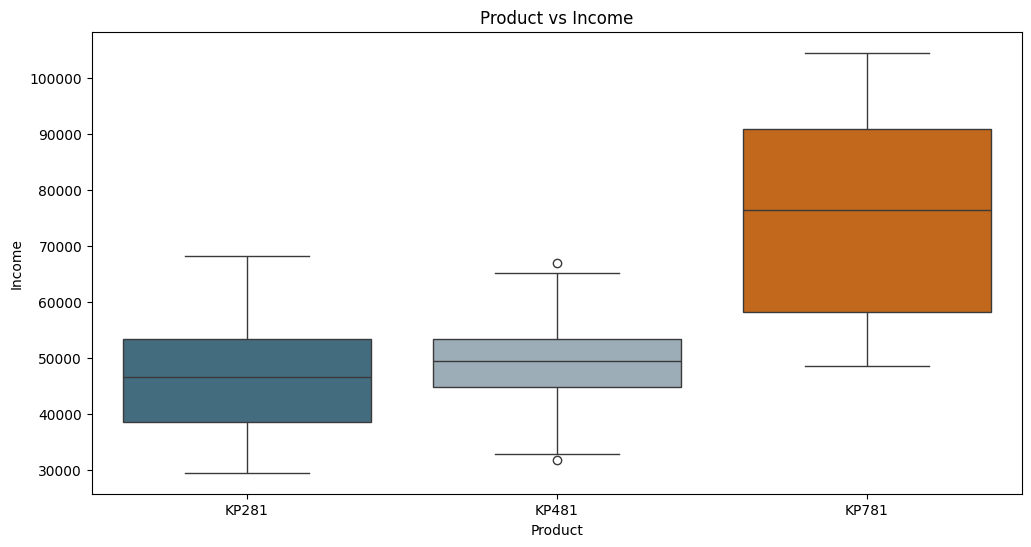

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601"]
ax_in= sns.boxplot(data=aero_df,x='Product',y='Income',palette = palette)
ax_in.set_title('Product vs Income')

Text(0.5, 1.0, 'Product vs Miles')

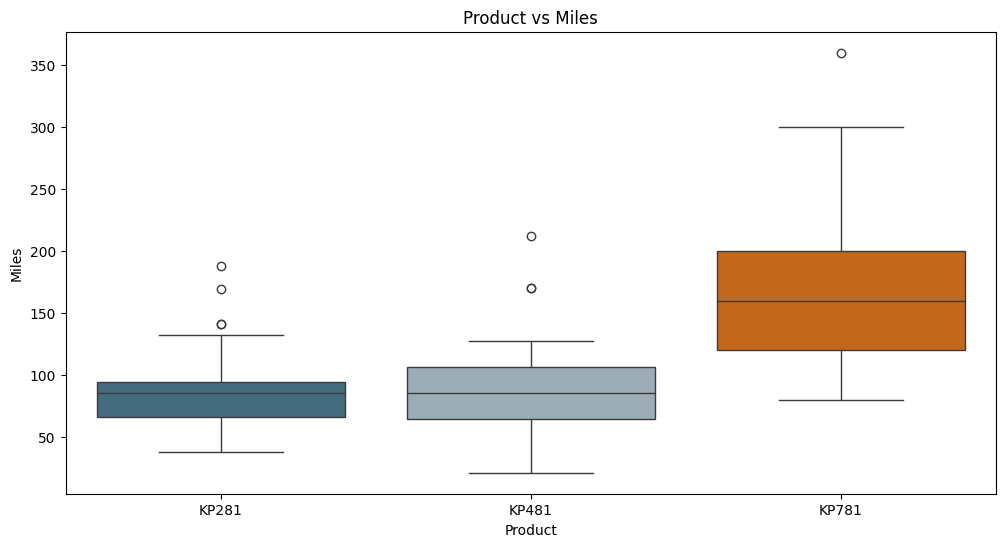

In [ ]:
plt.figure(figsize=(12,6))
palette = ["#3A7089", "#99AEBB", "#dc6601"]
ax_m= sns.boxplot(data=aero_df,x='Product',y='Miles',palette = palette)
ax_m.set_title('Product vs Miles')

#Insight :
#Analysis from the above graph indicates Customer who have higher education, higher income, and intend to engage in running activities exceeding 150 miles per week using KP781 treadmill

#Recommendation:
#Given Target customer age,education level,income, it's important to offer the KP281 and KP481 at an afforadable price

#Product Preference across age group

Text(0.5, 1.0, 'Product Preference across age group')

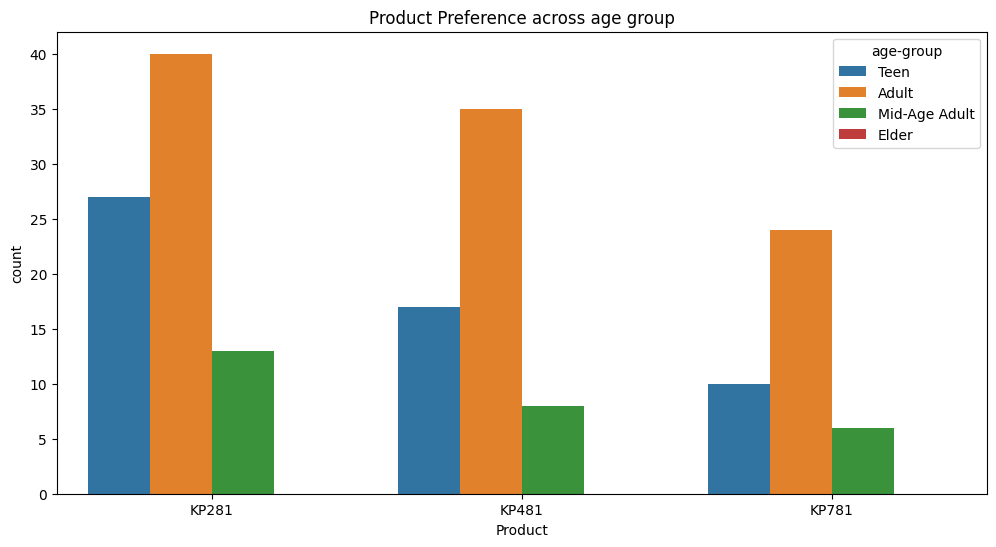

In [ ]:
plt.figure(figsize=(12,6))
ax_pr_ag = sns.countplot(data=aero_df,x='Product',hue='age-group')
ax_pr_ag.set_title("Product Preference across age group")

#Insight :  Among the age-group, Adult have high number of consuming the three products.

#Teen also have good number for consuming the three products

#Recommendation :
#It is recommend to use KP781 product for age above 40 group (Mid-Age adult)

#Product Preferencce across Education group

Text(0.5, 1.0, 'Product Preference across education group')

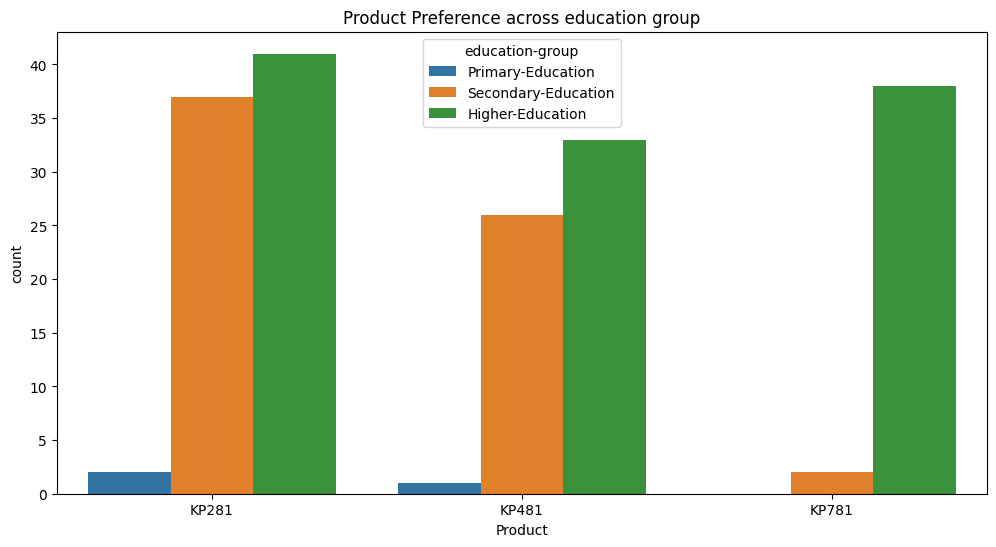

In [ ]:
plt.figure(figsize=(12,6))
ax_pr_ed = sns.countplot(data=aero_df,x='Product',hue='education-group')
ax_pr_ed.set_title("Product Preference across education group")

#Insight : Higher education and secondary eduaction customers consuming the products KP281,KP481.
#KP781 Products mostly consumed by Higher education customers

#Recommendation:
#It is recommend to promote more special offers in Primary education group

#Product Preferencce across Miles group

Text(0.5, 1.0, 'Product Preference across miles group')

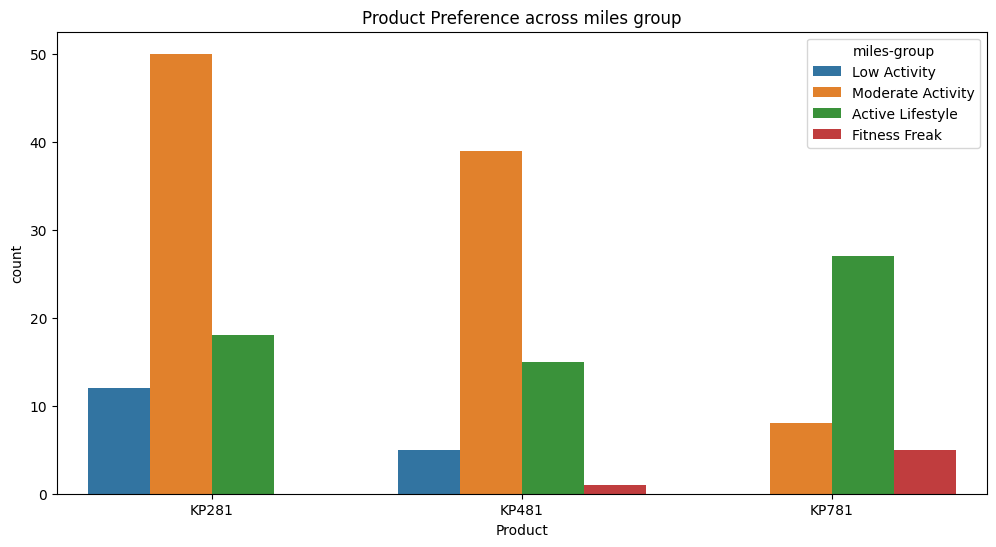

In [ ]:
plt.figure(figsize=(12,6))
ax_pr_mi = sns.countplot(data=aero_df,x='Product',hue='miles-group')
ax_pr_mi.set_title("Product Preference across miles group")

#Insight : Moderate activity group has high consuming of KP281 product and same for KP481. Active Lifestyle group has good number of consumption using KP781

#Recommendation : Nil

#Product Preferencce across Income group

Text(0.5, 1.0, 'Product Preference across income group')

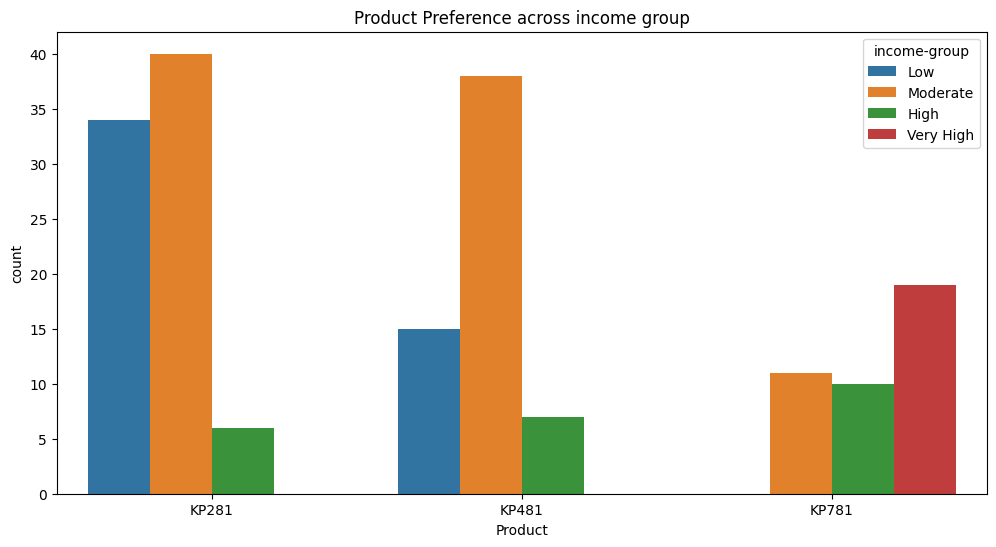

In [ ]:
plt.figure(figsize=(12,6))
ax_pr_in = sns.countplot(data=aero_df,x='Product',hue='income-group')
ax_pr_in.set_title("Product Preference across income group")

#Insight : Observed from the above graph, Moderate and low income group customers consuming KP281 and KP481.
#Customer who have very high income group consuimg KP781
#Recommendation : Nil

#Gender vs Product Usage

Text(0.5, 1.0, 'Gender vs Product Usage')

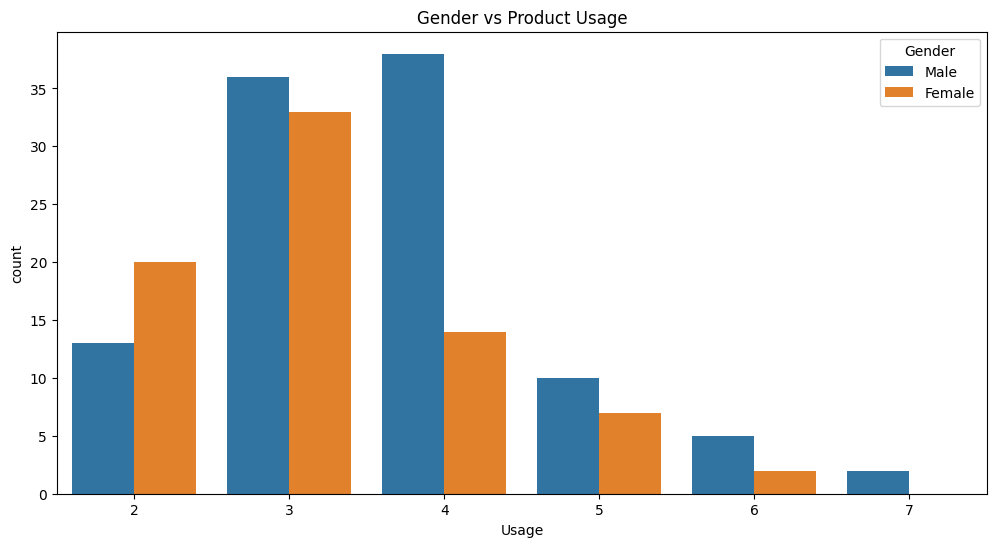

In [ ]:
plt.figure(figsize=(12,6))
ax_pr_gn = sns.countplot(data=aero_df,x='Usage',hue='Gender')
ax_pr_gn.set_title("Gender vs Product Usage")

#Insight : Almost 70% Female customer use the treadmill for 2 to 3 times a week and 70% Male customer use the treadmill for 3 to 4 times a week
#Recommendation : Nil

#Gender vs Fitness

Text(0.5, 1.0, 'Gender vs Fitness')

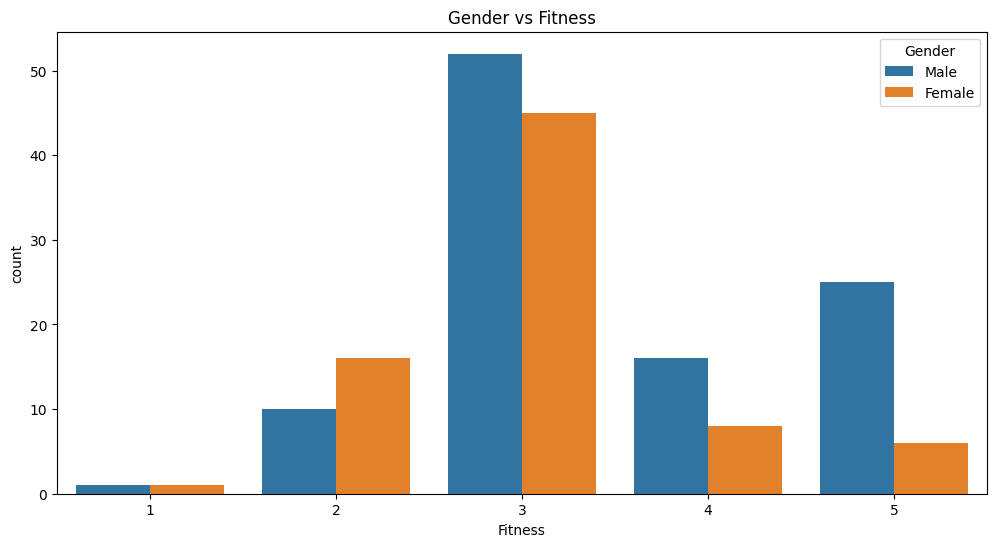

In [ ]:
plt.figure(figsize=(12,6))
ax_pr_ft = sns.countplot(data=aero_df,x='Fitness',hue='Gender')
ax_pr_ft.set_title("Gender vs Fitness")

#Insight : Almost 80% of Female customer rated themselves between 2 to 3 and 90% of Male customer rated themselves between 3 to 5.

#Recommendation : Nil

#For correlation: Heatmaps, pair plots

In [ ]:
numeric_aero_df = aero_df.select_dtypes(include='number')
numeric_aero_df

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [ ]:
numeric_aero_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


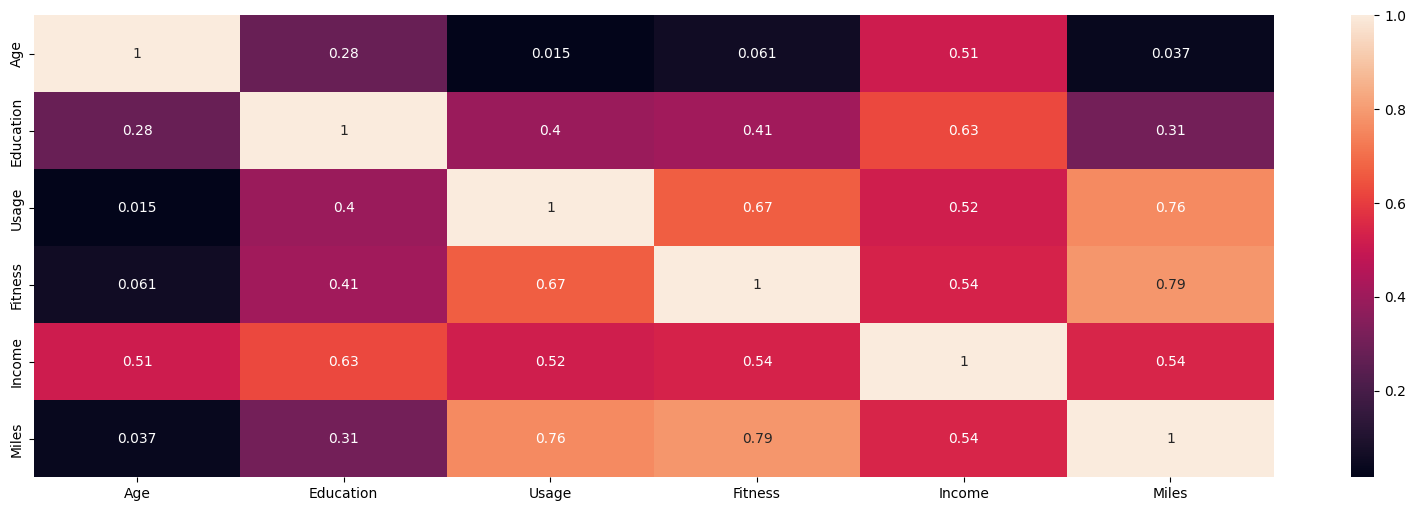

In [ ]:
plt.subplots(figsize=(20,6))
sns.heatmap(numeric_aero_df.corr(),annot=True)
plt.show()

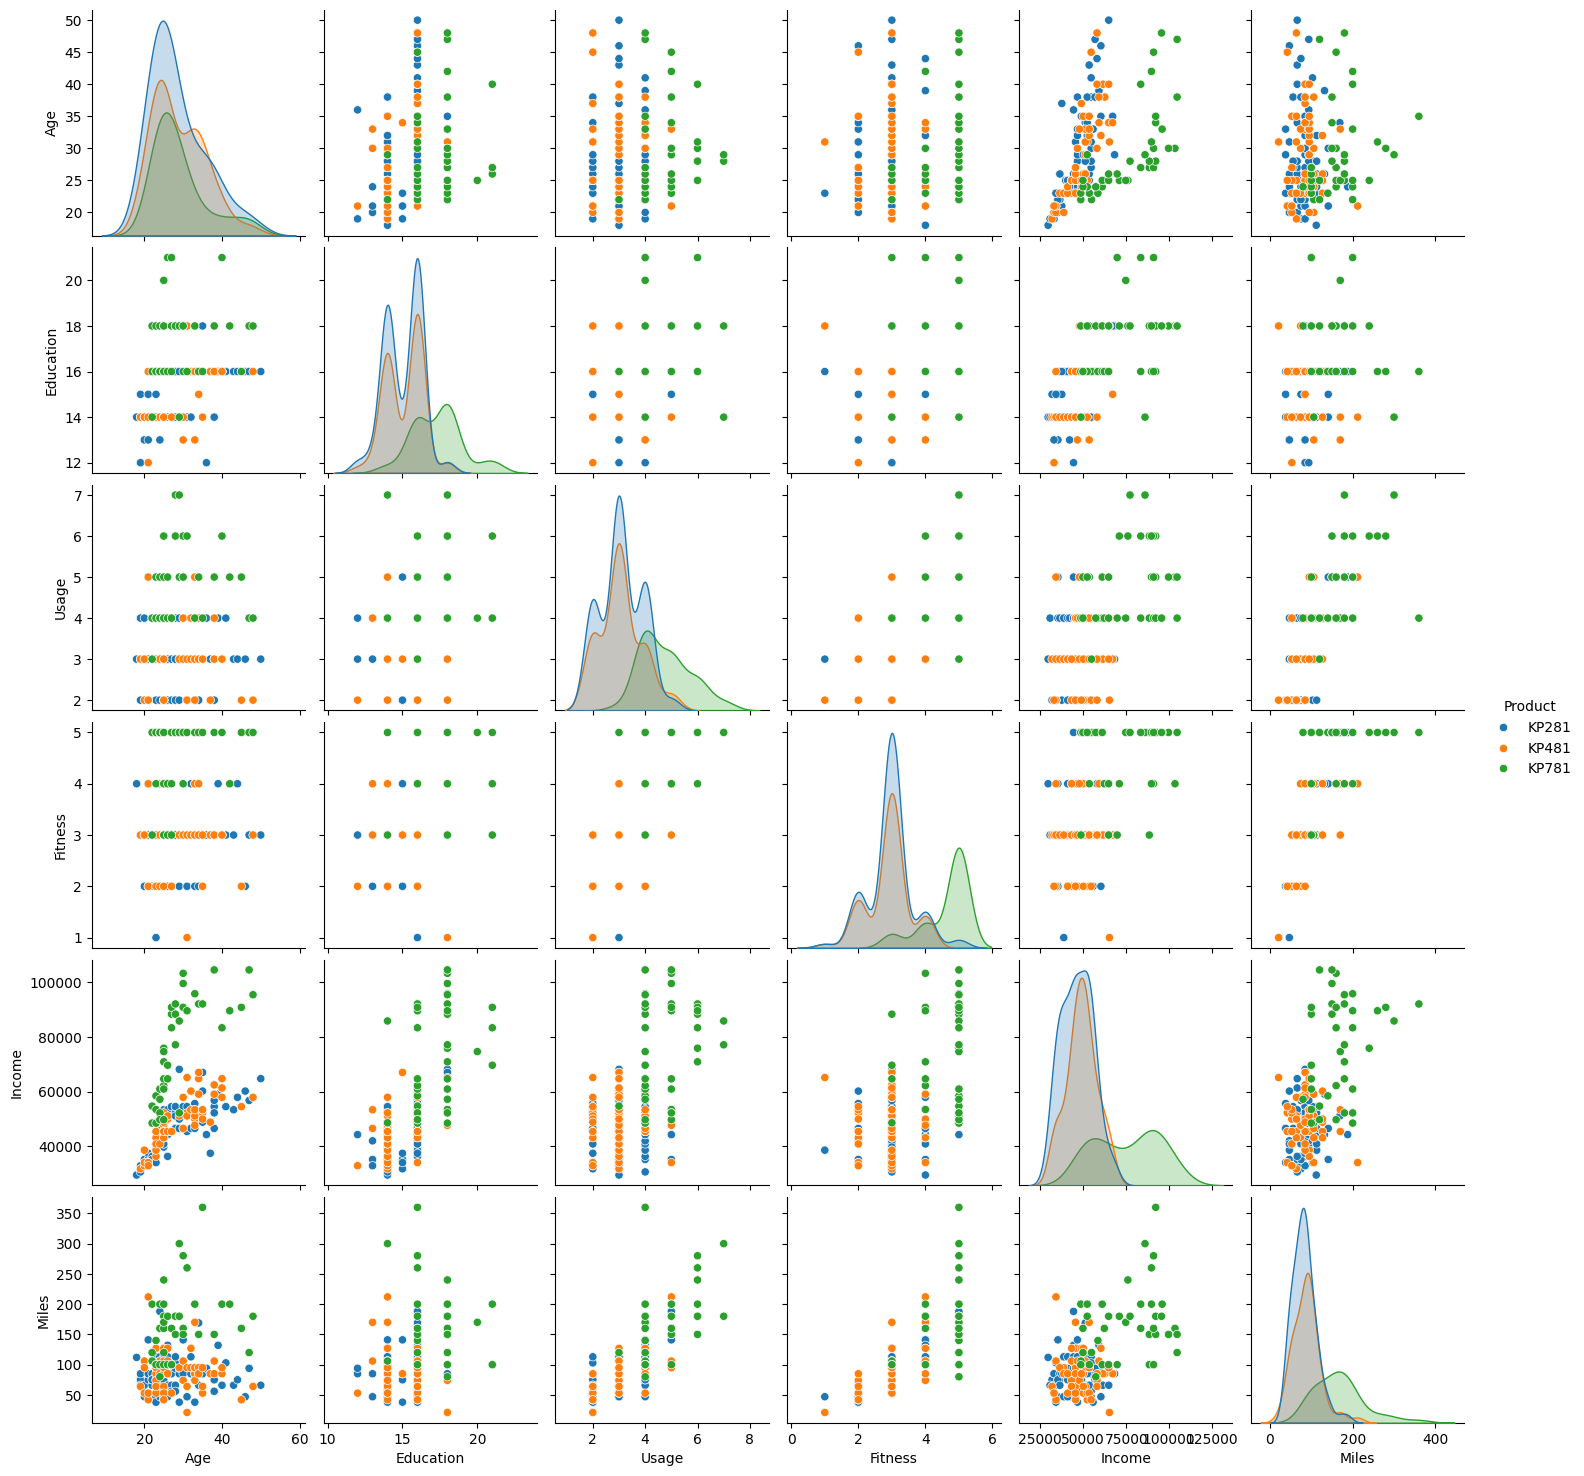

In [ ]:
sns.pairplot(aero_df,hue='Product')

#Marginal & Conditional probability

#Probability of product purchase with respect to Gender

In [ ]:
pd.crosstab(index =aero_df['Product'],columns = aero_df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


#Insights:
#Probability of treadmill purcahsed by female is 42%
#Conditional Probability of purchasing treadmill by female,
#KP281 - 22%
#KP481 - 16%
#KP781 - 4%

#Probability of treadmill purcahsed by male is 58%
#Conditional Probability of purchasing treadmill by male,
#KP281 - 22%
#KP481 - 17%
#KP781 - 18%

##Probability of product purchase with respect to Age

In [ ]:
pd.crosstab(index =aero_df['Product'],columns = aero_df['age-group'],margins = True,normalize = True ).round(2)

age-group,Teen,Adult,Mid-Age Adult,All
Product,,,,
KP281,0.15,0.22,0.07,0.44
KP481,0.09,0.19,0.04,0.33
KP781,0.06,0.13,0.03,0.22
All,0.30,0.55,0.15,1.00


#Insight :    
#Probability of treadmill purcahsed by Teen is 30%
#Conditional Probability of purchasing treadmill by Teen,
#KP281 - 15%
#KP481 - 9%
#KP781 - 6%

#Probability of treadmill purcahsed by Adult is 55%
#Conditional Probability of purchasing treadmill by Adult,
#KP281 - 22%
#KP481 - 19%
#KP781 - 13%

#Probability of treadmill purcahsed by Mid-Age Adult is 15%
#Conditional Probability of purchasing treadmill by Mid-Age Adult,
#KP281 - 7%
#KP481 - 4%
#KP781 - 3%



#Probability of product purchase with respect to Education

In [ ]:
pd.crosstab(index =aero_df['Product'],columns = aero_df['education-group'],margins = True,normalize = True ).round(2)

education-group,Primary-Education,Secondary-Education,Higher-Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


#Insight :    
#Probability of treadmill purcahsed by customer with Higher education is 62%
#Conditional Probability of purchasing treadmill by customer with Higher education,
#KP281 - 23%
#KP481 - 18%
#KP781 - 21%

#Probability of treadmill purcahsed by customer with secondary education is 36%
#Conditional Probability of purchasing treadmill by customer with secondary education,
#KP281 - 21%
#KP481 - 14%
#KP781 - 1%

#Probability of treadmill purcahsed by customer with primary eduaction is 2%
#Conditional Probability of purchasing treadmill by customer with primary eduaction,
#KP281 - 1%
#KP481 - 1%




#Probability of product purchase with respect to Income


In [ ]:
pd.crosstab(index =aero_df['Product'],columns = aero_df['income-group'],margins = True,normalize = True ).round(2)

income-group,Low,Moderate,High,Very High,All
Product,,,,,
KP281,0.19,0.22,0.03,0.00,0.44
KP481,0.08,0.21,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.27,0.49,0.13,0.11,1.00


#Insight :    
#Probability of treadmill purcahsed by customer with Moderate Income is 49%
#Conditional Probability of purchasing treadmill by customer with Moderate Income,
#KP281 - 22%
#KP481 - 21%
#KP781 - 6%

#Probability of treadmill purcahsed by customer with Low income is 27%
#Conditional Probability of purchasing treadmill by customer with low income,
#KP281 - 19%
#KP481 - 8%

#Probability of treadmill purcahsed by customer with high income is 13%
#Conditional Probability of purchasing treadmill by customer with high income,
#KP281 - 3%
#KP481 - 4%
#KP781 - 6%

#Probability of treadmill purcahsed by customer with very high income is 11%
#Conditional Probability of purchasing treadmill by customer with very high income,
#KP781 - 11%



#Probability of product purchase with respect to Marital status


In [ ]:
pd.crosstab(index =aero_df['Product'],columns = aero_df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


#Insight :    
#Probability of treadmill purcahsed by Married customer is 59%
#Conditional Probability of purchasing treadmill by Married customer,
#KP281 - 27%
#KP481 - 20%
#KP781 - 13%


#Probability of treadmill purcahsed by unmarried customer is 41%
#Conditional Probability of purchasing treadmill by unmarried customer,
#KP281 - 18%
#KP481 - 13%
#KP781 - 9%




#Probability of product purchase with respect to Fitness


In [ ]:
pd.crosstab(index =aero_df['Product'],columns = aero_df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


#Insight :    
#Probability of treadmill purcahsed by customer with Avg Fitness 3 is 54%
#Conditional Probability of purchasing treadmill by customer with Avg Fitness,
#KP281 - 30%
#KP481 - 22%
#KP781 - 2%


#Probability of treadmill purcahsed by customer with Fitness 2,4,5 is 15%
#Probability of treadmill purcahsed by customer with Fitness 1 is 1% very low




#Probability of product purchase with respect to Miles


In [ ]:
pd.crosstab(index =aero_df['Product'],columns = aero_df['miles-group'],margins = True,normalize = True ).round(2)

miles-group,Low Activity,Moderate Activity,Active Lifestyle,Fitness Freak,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


#Insight :    
#Probability of treadmill purcahsed by customer with Moderate Activity is 54%
#Conditional Probability of purchasing treadmill by customer with Moderate Activity,
#KP281 - 28%
#KP481 - 22%
#KP781 - 4%


#Probability of treadmill purcahsed by customer with Active lifestyle is 33%
#Conditional Probability of purchasing treadmill by customer with Active Lifestyle,
#KP281 - 10%
#KP481 - 8%
#KP781 - 15%

#Probability of treadmill purcahsed by customer with Low Activity is 9%
#Conditional Probability of purchasing treadmill by customer with Low Activity,
#KP281 - 7%
#KP481 - 3%

##Probability of treadmill purcahsed by customer with Fitness freak is 3%




#Customer Profiling

Observation from the above analysis,

Probability of purchase KP281 is 44%
Probability of purchase KP481 is 33%
Probability of purchase KP781 is 22%

#Customer Profile for KP281 is,

Gender - Male & Female

Age of customer - Mostly 18 to 35 and few 35 to 50

Education  - Secondary Education (13 & above 13)

Income - $60k

Usage - 2 to 4 times a week

Fitness - 2 to 4

Miles - 50 to 100 Miles a week



#Customer Profile for KP481 is,

Gender - Male and almost Female

Age of customer - Mostly 18 to 35 and few 35 to 50

Education  - Secondary Education (13 & above 13)

Income - $40k - $60k

Usage - 2 to 4 times a week

Fitness - 2 to 4

Miles - 50 to 200 Miles a week



#Customer Profile for KP781 is,

Gender - Male

Age of customer - Mostly 18 to 35

Education  - Higher Education (15 & above 15)

Income - $80k above

Usage - 4 to 7 times a week

Fitness - 3 to 5

Miles - 100 Miles a week


